In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000_images_part_1.zip' -d '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000'
!unzip '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000_images_part_2.zip' -d '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000'
!unzip '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv.zip' -d '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000'
!unzip '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv.zip' -d '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/'
!unzip '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv.zip' -d '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/'
!unzip '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv.zip' -d '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/'
!unzip '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv.zip' -d '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029335.jpg  
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029336.jpg  
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029337.jpg  
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029338.jpg  
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029339.jpg  
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029340.jpg  
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029341.jpg  
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029342.jpg  
  inflating: /content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000/ISIC_0029343.jpg  
  inflating: /content/drive/MyD

In [ ]:
#Importing required libraries
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

In [ ]:
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [ ]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [ ]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

In [ ]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = '/content/drive/MyDrive/ISIC/Input/skin-cancer-mnist-ham10000/'

# Merge images from both folders into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [ ]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

lesion_id      image_id  ...                       cell_type cell_type_idx
0  HAM_0000118  ISIC_0027419  ...  Benign keratosis-like lesions              2
1  HAM_0000118  ISIC_0025030  ...  Benign keratosis-like lesions              2
2  HAM_0002730  ISIC_0026769  ...  Benign keratosis-like lesions              2
3  HAM_0002730  ISIC_0025661  ...  Benign keratosis-like lesions              2
4  HAM_0001466  ISIC_0031633  ...  Benign keratosis-like lesions              2

[5 rows x 10 columns]

Image resize

In [ ]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,125))))

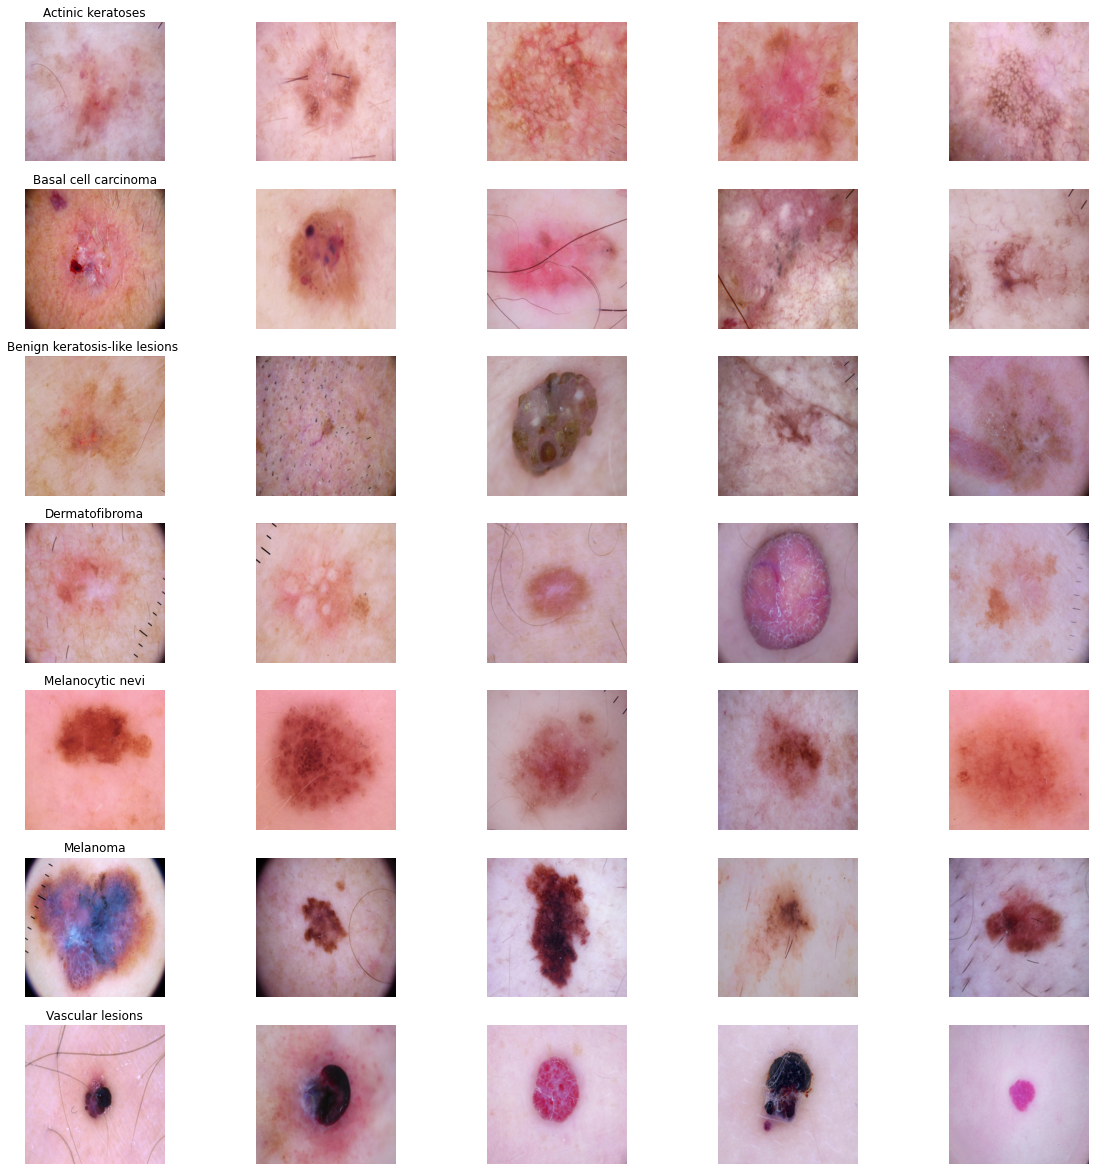

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [ ]:
df['image'].map(lambda x: x.shape).value_counts()

(125, 100, 3)    10015
Name: image, dtype: int64

### Model Training:

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(features, target, test_size=0.25,random_state=666,stratify=target)
tf.unique(trainX.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanoma', b'Melanocytic nevi',
       b'Benign keratosis-like lesions ', b'Actinic keratoses',
       b'Basal cell carcinoma', b'Vascular lesions', b'Dermatofibroma'],
      dtype=object)>, idx=<tf.Tensor: shape=(7511,), dtype=int32, numpy=array([0, 1, 1, ..., 1, 1, 1], dtype=int32)>)

In [ ]:
trainX = np.asarray(trainX['image'].tolist())
testX = np.asarray(testX['image'].tolist())

trainX = trainX / 255.0
testX = testX / 255.0

### ResNetV2

In [ ]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False, input_shape=(125,100,3), weights='imagenet')

In [ ]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.experimental.preprocessing.Rescaling((1./255)))
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

base_model.trainable=False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
callbacks = [ModelCheckpoint('/content/mdl_wts.hdf5', monitor='val_loss', verbose=1, save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=6)]

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(trainX)
datagen.fit(testX)

In [ ]:
epochs=50
history = model.fit(datagen.flow(trainX, trainY) ,validation_data=(testX, testY),epochs=epochs,callbacks=callbacks)

Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 1.1797 - accuracy: 0.6428
Epoch 00001: val_loss improved from inf to 0.87298, saving model to /content/mdl_wts.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


235/235 [==============================] - 32s 120ms/step - loss: 1.1797 - accuracy: 0.6428 - val_loss: 0.8730 - val_accuracy: 0.7029
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.9717 - accuracy: 0.6837
Epoch 00002: val_loss improved from 0.87298 to 0.81193, saving model to /content/mdl_wts.hdf5
235/235 [==============================] - 26s 112ms/step - loss: 0.9717 - accuracy: 0.6837 - val_loss: 0.8119 - val_accuracy: 0.7157
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 0.9001 - accuracy: 0.6983
Epoch 00003: val_loss improved from 0.81193 to 0.77878, saving model to /content/mdl_wts.hdf5
235/235 [==============================] - 26s 113ms/step - loss: 0.9001 - accuracy: 0.6983 - val_loss: 0.7788 - val_accuracy: 0.7224
Epoch 4/50
235/235 [==============================] - ETA: 0s - loss: 0.8562 - accuracy: 0.7063
Epoch 00004: val_loss improved from 0.77878 to 0.76968, saving model to /content/mdl_wts.hdf5
235/235 [===================

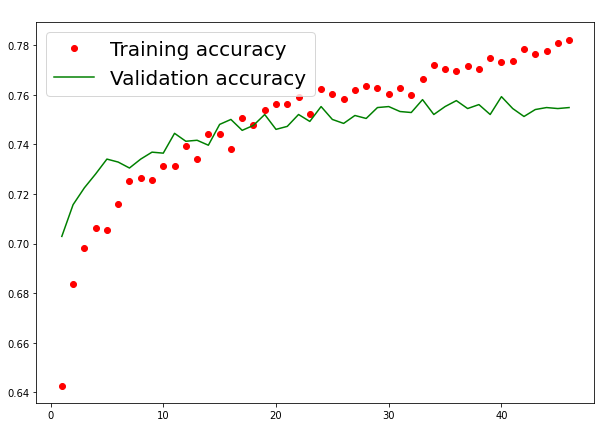

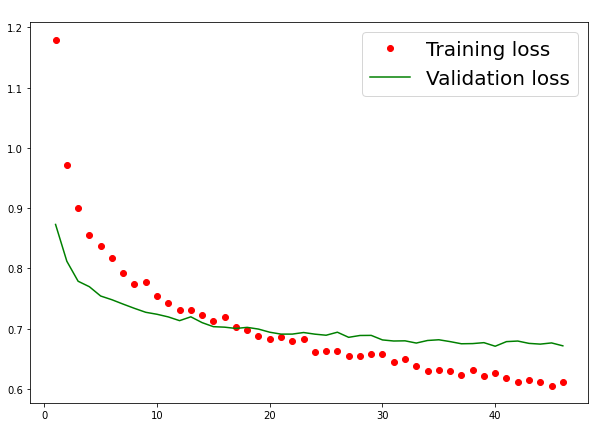

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'bo', label='Training accuracy',color='red')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',color='green')
plt.title('Training and validation accuracy',color='white')
plt.legend(fontsize=20)
plt.savefig('CNN Val acc.png', dpi=400, bbox_inches="tight")

plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='green')
plt.title('Training and validation loss',color='white')
plt.legend(fontsize=20)
plt.savefig('CNN Val loss.png', dpi=400,bbox_inches="tight")

plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                      

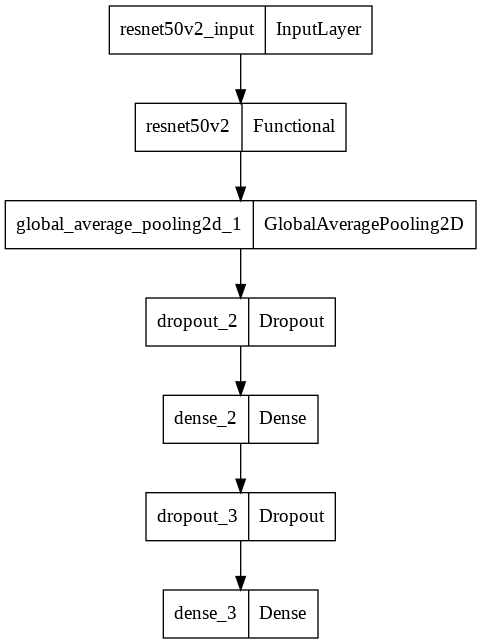

In [ ]:
from tensorflow.keras.utils import plot_model 
plot_model(model)

In [ ]:
## Loading best model based on its weights

from numpy import loadtxt
from tensorflow.keras.models import load_model
model = load_model('mdl_wts.hdf5')
score = model.evaluate(testX, testY,verbose=1)

print(score)

79/79 [==============================] - 3s 24ms/step - loss: 0.6710 - accuracy: 0.7592
[0.6709663271903992, 0.7591853141784668]


313/313 [==============================] - 5s 14ms/step


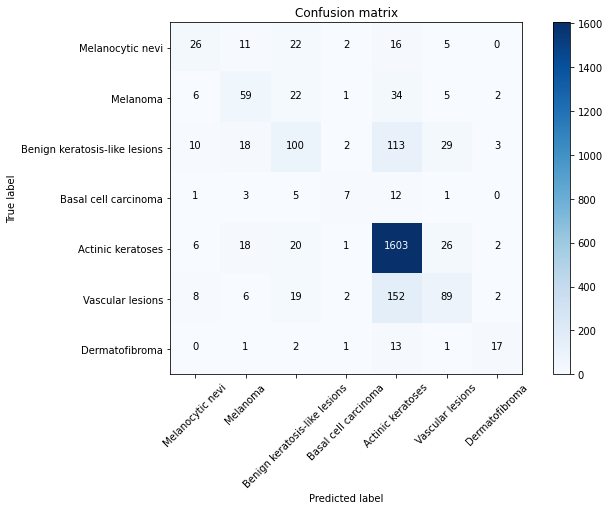

In [ ]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Melanocytic nevi',
            'Melanoma',
            'Benign keratosis-like lesions',
            'Basal cell carcinoma',
            'Actinic keratoses',
           'Vascular lesions',
           'Dermatofibroma']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)

 

# plot the confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [ ]:
predIdxs = model.predict(testX, batch_size=16)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['nv','mel','bkl','bcc','akiec','vasc','df']))

              precision    recall  f1-score   support

          nv       0.46      0.32      0.37        82
         mel       0.51      0.46      0.48       129
         bkl       0.53      0.36      0.43       275
         bcc       0.44      0.24      0.31        29
       akiec       0.83      0.96      0.89      1676
        vasc       0.57      0.32      0.41       278
          df       0.65      0.49      0.56        35

    accuracy                           0.76      2504
   macro avg       0.57      0.45      0.49      2504
weighted avg       0.73      0.76      0.73      2504



Plot model prediction

In [ ]:
# getting predictions on val set.
pred=model.predict(testX, batch_size=16)
Y_pred_classes=np.argmax(pred,axis=1)

Y_true = np.argmax(testY,axis = 0) 

# Mapping Classes
classes = {0 : 'Melanocytic nevi',
            1 : 'Melanoma',
            2 : 'Benign keratosis-like lesions',
            3: 'Basal cell carcinoma',
            4: 'Actinic keratoses',
           5:'Vascular lesions',
           6:'Dermatofibroma'}

In [ ]:
type(Y_pred_classes), testY.ravel()[1]

(numpy.ndarray, 4)

In [ ]:
incorrect = []
for i in range(len(testY)):
    if(not Y_pred_classes[i] == testY.ravel()[i]):
        incorrect.append(i)
    # if(len(incorrect) == 22):
    #     break

correct = []
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY.ravel()[i]):
        correct.append(i)
    # if(len(correct) == 100):
    #     break

In [ ]:
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY.ravel()[i]):
      correct.append(i)
      print(i,str(classes[testY.ravel()[correct[i]]]))

1 Actinic keratoses
2 Actinic keratoses
3 Actinic keratoses
4 Actinic keratoses
5 Actinic keratoses
6 Actinic keratoses
7 Actinic keratoses
8 Actinic keratoses
9 Melanoma
10 Actinic keratoses
11 Actinic keratoses
12 Actinic keratoses
13 Actinic keratoses
14 Actinic keratoses
15 Actinic keratoses
17 Actinic keratoses
18 Actinic keratoses
19 Actinic keratoses
20 Actinic keratoses
21 Benign keratosis-like lesions
22 Actinic keratoses
23 Actinic keratoses
24 Actinic keratoses
25 Benign keratosis-like lesions
28 Actinic keratoses
29 Actinic keratoses
30 Actinic keratoses
32 Actinic keratoses
34 Actinic keratoses
35 Actinic keratoses
37 Actinic keratoses
38 Actinic keratoses
39 Melanoma
40 Vascular lesions
41 Actinic keratoses
43 Actinic keratoses
44 Actinic keratoses
45 Actinic keratoses
46 Actinic keratoses
49 Actinic keratoses
50 Benign keratosis-like lesions
51 Actinic keratoses
53 Actinic keratoses
54 Actinic keratoses
55 Vascular lesions
56 Actinic keratoses
57 Actinic keratoses
59 Act

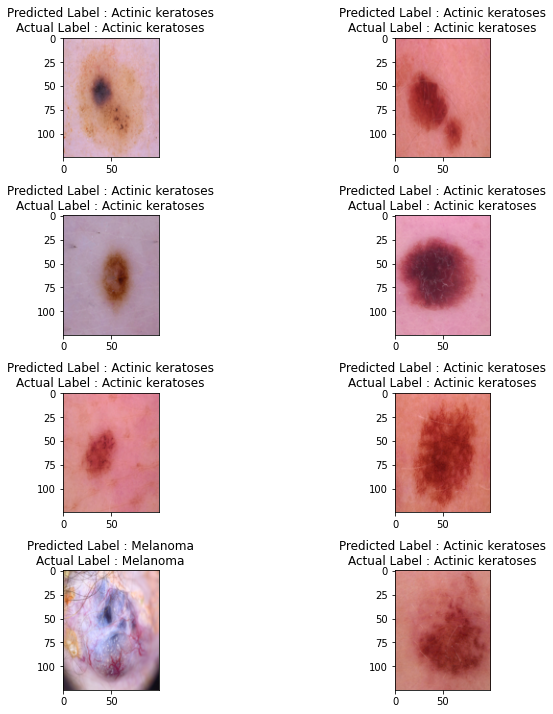

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[2066]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2066]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[2066]]]))

ax[0,1].imshow(testX[correct[2107]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2107]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[2107]]]))

ax[1,0].imshow(testX[correct[2125]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2125]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[2125]]]))

ax[1,1].imshow(testX[correct[358]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[358]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[358]]]))

ax[2,0].imshow(testX[correct[2318]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2318]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[2318]]]))
ax[2,1].imshow(testX[correct[359]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[359]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[359]]]))

ax[3,0].imshow(testX[correct[377]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[377]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[377]]]))

ax[3,1].imshow(testX[correct[464]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[464]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[464]]]))
fig.tight_layout(pad=1.0)
plt.show()

LIME explainations

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 7.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=94ad408c585dadbae8232902fc5f7cba357e7453a337fde7ef8e376c75c5f028
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


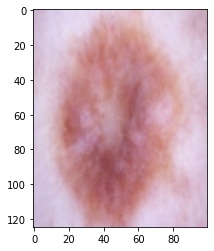

In [ ]:
plt.imshow(testX[correct[2130]])

In [ ]:
import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(testX[correct[2130 ]], model.predict, top_labels=5, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

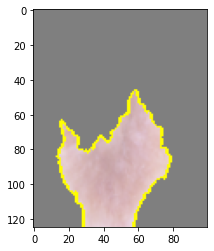

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

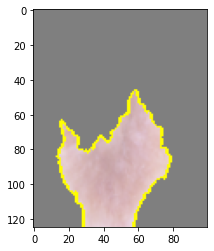

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

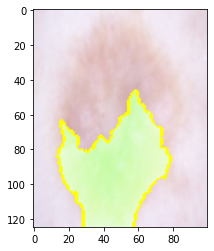

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

(-0.5, 99.5, 124.5, -0.5)

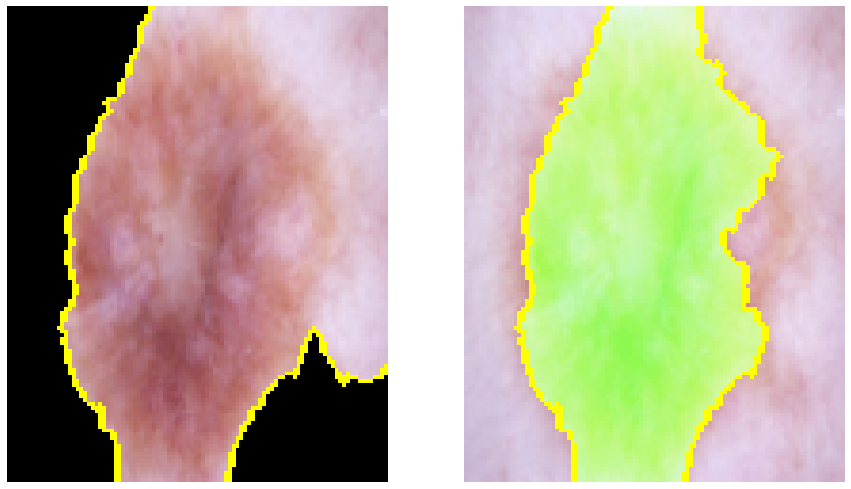

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=3, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

GRADcam

In [ ]:
!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.4 MB/s 


In [ ]:
model.save_weights('my_model_weights.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_new = load_model("my_model_weights.h5")

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 100	Scores: [-84.14729309082031],	Regularization: [('TotalVariation2D', [14.165189743041992]), ('Norm', [25.184541702270508])]
Steps: 200	Scores: [-100.71003723144531],	Regularization: [('TotalVariation2D', [8.44479751586914]), ('Norm', [19.084177017211914])]


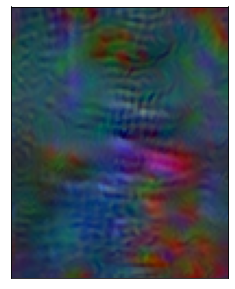

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# model = load_model('mdl_wts.hdf5')

# Create Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda x: K.mean(x[:, 1])

# Generate max activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()

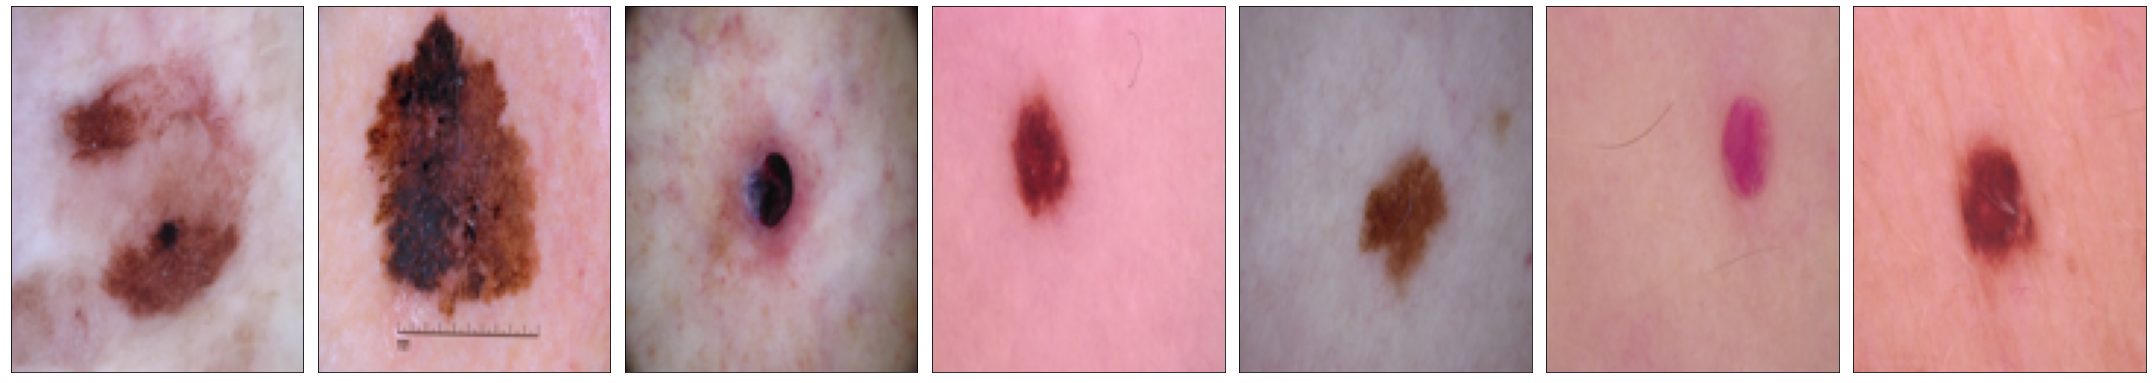

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

# Load images
# img1 = load_img('../input/covid-cxr-image-dataset-research/COVID_IEEE/virus/person1213_virus_2058.jpeg', target_size=(224, 224))
# img2 = load_img('../input/covid-cxr-image-dataset-research/COVID_IEEE/virus/person1273_virus_2191.jpeg', target_size=(224, 224))
# img3 = load_img('../input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0206-0001.jpeg', target_size=(224, 224))

X = np.asarray([testX[correct[337]], testX[correct[2452]], testX[correct[2445]], testX[correct[2483]], testX[correct[2194]], testX[correct[2102]], testX[correct[1709]]])

# Prepare datasets
# X = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 7,
    'figsize': (30, 15),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(X)):
    ax[i].imshow(X[i])
plt.tight_layout()
plt.show()

In [ ]:
# Define loss function. 1 is the imagenet index corresponding to Goldfish,
# And 294 is one corresponding to Bear.
def loss(output):
    return (output[1][1][1], output[1][1][0], output[1][0][1], output[1][0][0], output[0][1][1], output[0][1][1], output[0][0][0])

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

In [ ]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i]) 
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()

ValueError: ignored

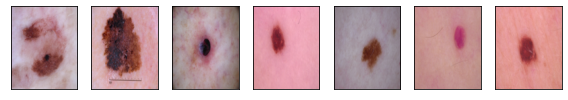

In [ ]:
ins = np.asarray([testX[correct[337]], testX[correct[2452]], testX[correct[2445]], testX[correct[2483]], testX[correct[2194]], testX[correct[2102]], testX[correct[1709]]])

#S = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 7,
    'figsize': (8, 4),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(ins)):
    ax[i].imshow(ins[i])
plt.tight_layout()
plt.show()

Saliency Maps

In [ ]:
ins.shape

(7, 125, 100, 3)

In [ ]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object
saliency = Saliency(model, model_modifier, clone=False)

# Generate saliency map
saliency_map = saliency(loss, ins)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

AttributeError: ignored

In [ ]:
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(loss, X, smooth_samples=100)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

AttributeError: ignored

SHAP

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 7.8 MB/s 


In [ ]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = trainX[np.random.choice(trainX.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(testX[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -testX[1:5])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: ignored

### Depthwise convolutional NN

In [ ]:
inputs = Input(shape=(100, 125, 3))
# First conv block
# x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
# x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# # second conv block
# x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
# x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# # third conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# # first separable conv block
# x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)


# second separable conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# third separable conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# fourth separable conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)


# fifth separable conv block
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(units=32, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=7, activation='softmax')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)

EPOCHS = 50
BS = 16


# compile our model
print("[INFO] compiling model...")
opt = "adam"
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
callbacks = [ModelCheckpoint('/content/mdl_wts.hdf5', monitor='val_loss', verbose=1, save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=6)]
model.summary()

[INFO] compiling model...
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100, 125, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 100, 125, 16)      448       
                                                                 
 conv2d_25 (Conv2D)          (None, 100, 125, 16)      2320      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 50, 62, 16)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_39 (Separa  (None, 50, 62, 64)       1232      
 bleConv2D)                                                      
                                                                 
 separable_conv2d_40 (Separa  (No

In [ ]:
# data normalization by dividing image pixels by 255
trainX = np.array(trainX) / 255.0
testX = np.array(testX) / 255.0

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(trainX)
datagen.fit(testX)

In [ ]:
epochs=50
history = model.fit(datagen.flow(trainX, trainY) ,validation_data=(testX, testY),epochs=epochs,callbacks=callbacks)

Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 1.2850 - accuracy: 0.6578
Epoch 00001: val_loss improved from inf to 1.18763, saving model to /content/mdl_wts.hdf5
235/235 [==============================] - 22s 87ms/step - loss: 1.2850 - accuracy: 0.6578 - val_loss: 1.1876 - val_accuracy: 0.6693
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 1.1698 - accuracy: 0.6681
Epoch 00002: val_loss improved from 1.18763 to 1.13753, saving model to /content/mdl_wts.hdf5
235/235 [==============================] - 20s 85ms/step - loss: 1.1698 - accuracy: 0.6681 - val_loss: 1.1375 - val_accuracy: 0.6693
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 1.1341 - accuracy: 0.6694
Epoch 00003: val_loss improved from 1.13753 to 1.13166, saving model to /content/mdl_wts.hdf5
235/235 [==============================] - 20s 85ms/step - loss: 1.1341 - accuracy: 0.6694 - val_loss: 1.1317 - val_accuracy: 0.6693
Epoch 4/50
235/235 [===============

KeyboardInterrupt: ignored

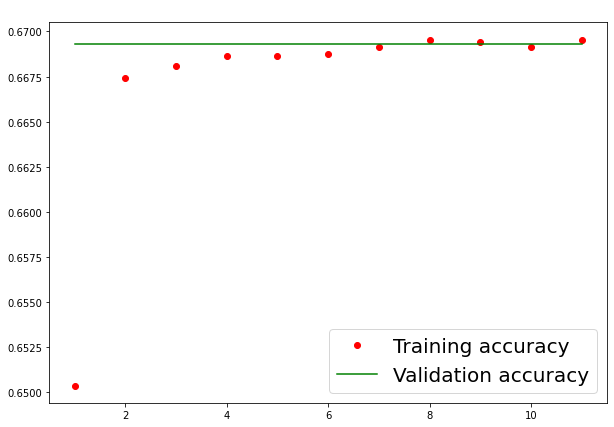

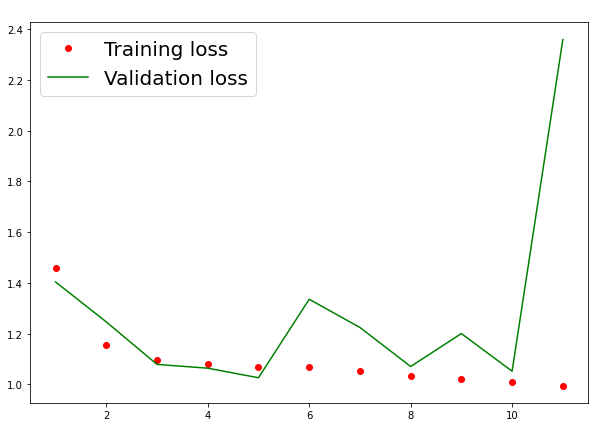

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'bo', label='Training accuracy',color='red')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',color='green')
plt.title('Training and validation accuracy',color='white')
plt.legend(fontsize=20)
plt.savefig('CNN Val acc.png', dpi=400, bbox_inches="tight")

plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='green')
plt.title('Training and validation loss',color='white')
plt.legend(fontsize=20)
plt.savefig('CNN Val loss.png', dpi=400,bbox_inches="tight")

plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                 3591      
                                                      

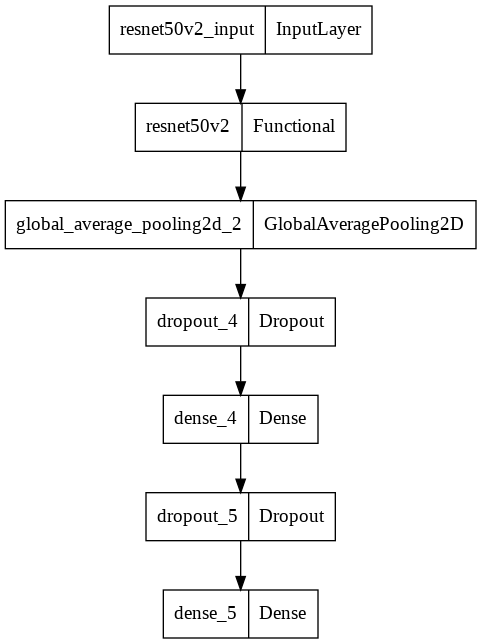

In [ ]:
from tensorflow.keras.utils import plot_model 
plot_model(model)

In [ ]:
## Loading best model based on its weights

from numpy import loadtxt
from tensorflow.keras.models import load_model
model = load_model('mdl_wts.hdf5')
score = model.evaluate(testX, testY,verbose=1)

print(score)

79/79 [==============================] - 1s 7ms/step - loss: 1.0261 - accuracy: 0.6693
[1.0260944366455078, 0.669329047203064]


313/313 [==============================] - 1s 3ms/step


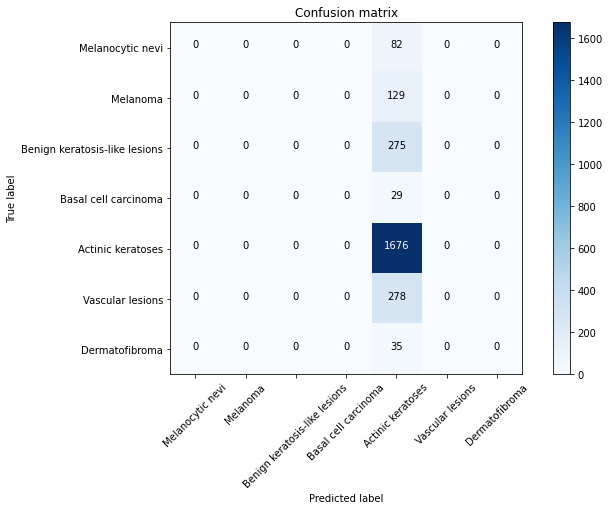

In [ ]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Melanocytic nevi',
            'Melanoma',
            'Benign keratosis-like lesions',
            'Basal cell carcinoma',
            'Actinic keratoses',
           'Vascular lesions',
           'Dermatofibroma']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)

 

# plot the confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [ ]:
predIdxs = model.predict(testX, batch_size=16)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['nv','mel','bkl','bcc','akiec','vasc','df']))

              precision    recall  f1-score   support

          nv       0.45      0.28      0.35        82
         mel       0.55      0.40      0.46       129
         bkl       0.55      0.44      0.49       275
         bcc       0.58      0.24      0.34        29
       akiec       0.82      0.95      0.88      1676
        vasc       0.55      0.34      0.42       278
          df       0.58      0.40      0.47        35

    accuracy                           0.76      2504
   macro avg       0.58      0.44      0.49      2504
weighted avg       0.73      0.76      0.74      2504



Plot model prediction

In [ ]:
# getting predictions on val set.
pred=model.predict(testX, batch_size=16)
Y_pred_classes=np.argmax(pred,axis=1)

Y_true = np.argmax(testY,axis = 0) 

# Mapping Classes
classes = {0 : 'Melanocytic nevi',
            1 : 'Melanoma',
            2 : 'Benign keratosis-like lesions',
            3: 'Basal cell carcinoma',
            4: 'Actinic keratoses',
           5:'Vascular lesions',
           6:'Dermatofibroma'}

In [ ]:
type(Y_pred_classes), testY.ravel()[1]

(numpy.ndarray, 4)

In [ ]:
incorrect = []
for i in range(len(testY)):
    if(not Y_pred_classes[i] == testY.ravel()[i]):
        incorrect.append(i)
    # if(len(incorrect) == 22):
    #     break

correct = []
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY.ravel()[i]):
        correct.append(i)
    # if(len(correct) == 100):
    #     break

In [ ]:
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY.ravel()[i]):
      correct.append(i)
      print(i,str(classes[testY.ravel()[correct[i]]]))

1 Actinic keratoses
2 Actinic keratoses
3 Actinic keratoses
4 Actinic keratoses
5 Actinic keratoses
6 Actinic keratoses
7 Actinic keratoses
8 Actinic keratoses
9 Melanoma
10 Actinic keratoses
11 Actinic keratoses
12 Actinic keratoses
13 Actinic keratoses
14 Actinic keratoses
15 Actinic keratoses
17 Actinic keratoses
18 Actinic keratoses
19 Actinic keratoses
20 Actinic keratoses
21 Benign keratosis-like lesions
22 Actinic keratoses
23 Actinic keratoses
24 Benign keratosis-like lesions
28 Actinic keratoses
29 Vascular lesions
30 Actinic keratoses
32 Actinic keratoses
34 Actinic keratoses
35 Actinic keratoses
36 Actinic keratoses
37 Actinic keratoses
39 Vascular lesions
40 Actinic keratoses
41 Actinic keratoses
43 Actinic keratoses
44 Actinic keratoses
45 Actinic keratoses
46 Benign keratosis-like lesions
49 Actinic keratoses
50 Benign keratosis-like lesions
51 Actinic keratoses
53 Actinic keratoses
54 Actinic keratoses
55 Actinic keratoses
56 Actinic keratoses
57 Actinic keratoses
58 Act

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[2066]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2066]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[2066]]]))

ax[0,1].imshow(testX[correct[2107]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2107]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[2107]]]))

ax[1,0].imshow(testX[correct[2125]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2125]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[2125]]]))

ax[1,1].imshow(testX[correct[358]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[358]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[358]]]))

ax[2,0].imshow(testX[correct[2318]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2318]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[2318]]]))
ax[2,1].imshow(testX[correct[359]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[359]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[359]]]))

ax[3,0].imshow(testX[correct[377]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[377]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[377]]]))

ax[3,1].imshow(testX[correct[464]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[464]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY.ravel()[correct[464]]]))
fig.tight_layout(pad=1.0)
plt.show()

LIME explainations

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 8.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=8675d2f4c8404211c825fd4edfcda9f99751ccb14d6fcf24bfa1d663de7575b5
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


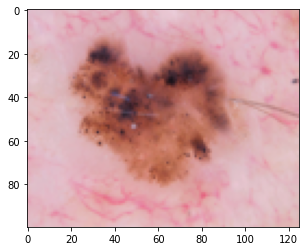

In [ ]:
plt.imshow(testX[correct[2107]])

In [ ]:
import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(testX[correct[2107]], model.predict, top_labels=5, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


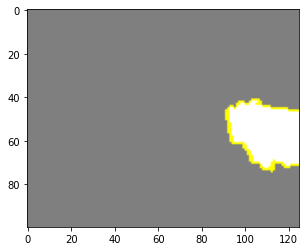

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


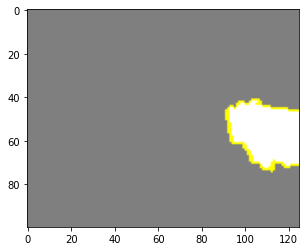

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


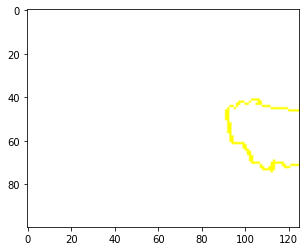

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 124.5, 99.5, -0.5)

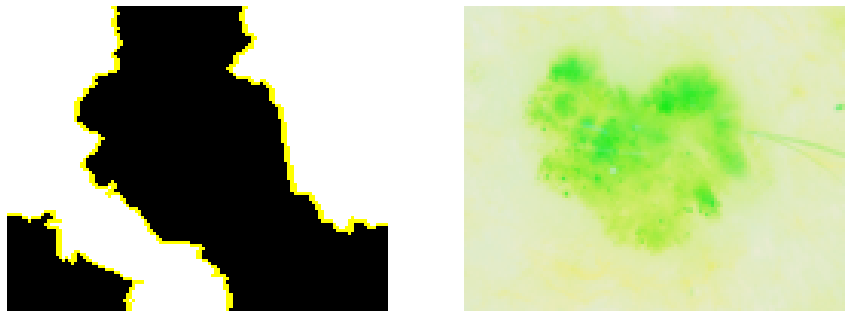

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

GRADcam

In [ ]:
!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.8 MB/s 


In [ ]:
model.save_weights('my_model_weights.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_new = load_model("my_model_weights.h5")

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 100	Scores: [-73.39622497558594],	Regularization: [('TotalVariation2D', [9.975713729858398]), ('Norm', [29.955913543701172])]
Steps: 200	Scores: [-90.60033416748047],	Regularization: [('TotalVariation2D', [7.207845687866211]), ('Norm', [25.036609649658203])]


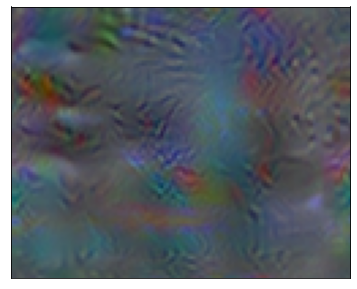

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# model = load_model('mdl_wts.hdf5')

# Create Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda x: K.mean(x[:, 1])

# Generate max activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()

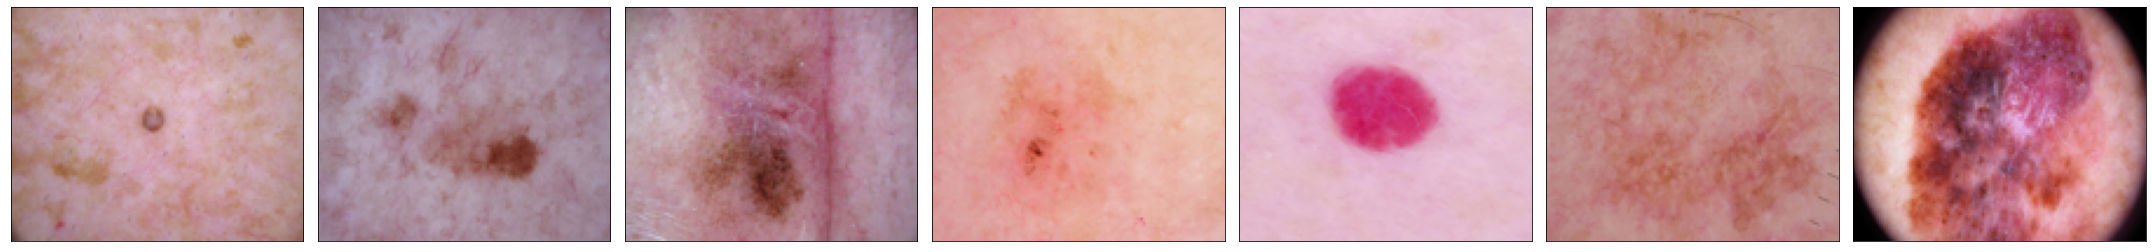

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

# Load images
# img1 = load_img('../input/covid-cxr-image-dataset-research/COVID_IEEE/virus/person1213_virus_2058.jpeg', target_size=(224, 224))
# img2 = load_img('../input/covid-cxr-image-dataset-research/COVID_IEEE/virus/person1273_virus_2191.jpeg', target_size=(224, 224))
# img3 = load_img('../input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0206-0001.jpeg', target_size=(224, 224))

X = np.asarray([testX[correct[2446]], testX[correct[2452]], testX[correct[2445]], testX[correct[2483]], testX[correct[2194]], testX[correct[2102]], testX[correct[1709]]])

# Prepare datasets
# X = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 7,
    'figsize': (30, 15),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(X)):
    ax[i].imshow(X[i])
plt.tight_layout()
plt.show()

In [ ]:
# Define loss function. 1 is the imagenet index corresponding to Goldfish,
# And 294 is one corresponding to Bear.
def loss(output):
    return (output[1][1], output[0][1], output[0][0])

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

In [ ]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i]) 
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()

ValueError: ignored